In [ ]:
#easy to use recommended datasets, but you can use any reference you want that is labeled
#tabula muris
#tabula muris senis
#tabula sapiens

In [1]:
!curl -O "https://czb-tabula-muris-senis.s3.us-west-2.amazonaws.com/Data-objects/tabula-muris-senis-droplet-official-raw-obj.h5ad"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3868M  100 3868M    0     0  14.5M      0  0:04:25  0:04:25 --:--:-- 15.7M


In [ ]:
#example human tabula sapiens dataset, more on figshare
#!wget https://figshare.com/ndownloader/files/34701982
#!unzip 34701982

In [2]:
import scanpy as sc
import scvi

Global seed set to 0


In [3]:
ref_data = sc.read_h5ad('tabula-muris-senis-droplet-official-raw-obj.h5ad')

In [5]:
ref_data.obs.tissue.unique().tolist()

['Tongue',
 'Heart_and_Aorta',
 'Marrow',
 'Mammary_Gland',
 'Fat',
 'Kidney',
 'Liver',
 'Lung',
 'Limb_Muscle',
 'Pancreas',
 'Spleen',
 'Thymus',
 'Bladder',
 'Skin',
 'Large_Intestine',
 'Trachea']

In [7]:
ref_data = ref_data[ref_data.obs.tissue == 'Lung']
ref_data.obs

,age,cell,cell_ontology_class,cell_ontology_id,free_annotation,method,mouse.id,n_genes,sex,subtissue,tissue,tissue_free_annotation
index,,,,,,,,,,,,
AAACGGGTCGCCCTTA-1-11-0-0,18m,MACA_18m_F_LUNG_50_AAACGGGTCGCCCTTA,B cell,NA,B,droplet,18-F-50,1821.0,female,nan,Lung,Lung
AAAGATGAGCAGACTG-1-11-0-0,18m,MACA_18m_F_LUNG_50_AAAGATGAGCAGACTG,non-classical monocyte,NA,Nonclassical Monocyte,droplet,18-F-50,1333.0,female,nan,Lung,Lung
AAAGATGAGCCGTCGT-1-11-0-0,18m,MACA_18m_F_LUNG_50_AAAGATGAGCCGTCGT,NK cell,NA,Natural Killer,droplet,18-F-50,1455.0,female,nan,Lung,Lung
AAAGCAACATGGTAGG-1-11-0-0,18m,MACA_18m_F_LUNG_50_AAAGCAACATGGTAGG,alveolar macrophage,NA,Alveolar Macrophage,droplet,18-F-50,3322.0,female,nan,Lung,Lung
AAAGCAAGTCTAGTGT-1-11-0-0,18m,MACA_18m_F_LUNG_50_AAAGCAAGTCTAGTGT,B cell,NA,B,droplet,18-F-50,1120.0,female,nan,Lung,Lung
...,...,...,...,...,...,...,...,...,...,...,...,...
10X_P8_13_TTTGGTTAGGGATACC-1,3m,10X_P8_13_TTTGGTTAGGGATACC,fibroblast of lung,CL:0000499,Alveolar Fibroblast,droplet,3-M-7/8,NaN,male,immune-endo-depleted,Lung,Lung
10X_P8_13_TTTGGTTTCCTGTACC-1,3m,10X_P8_13_TTTGGTTTCCTGTACC,NK cell,CL:0000623,Natural Killer,droplet,3-M-7/8,NaN,male,immune-endo-depleted,Lung,Lung
10X_P8_13_TTTGTCAAGAGTCGGT-1,3m,10X_P8_13_TTTGTCAAGAGTCGGT,pulmonary interstitial fibroblast,CL:0000499,Myofibroblast,droplet,3-M-7/8,NaN,male,immune-endo-depleted,Lung,Lung


In [13]:
adata = sc.read_10x_h5('lung1.h5')
adata.var_names_make_unique()

/home/jrlab2019/miniconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [14]:
adata = adata.concatenate(ref_data)
adata.obs

/home/jrlab2019/miniconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


,age,cell,cell_ontology_class,cell_ontology_id,free_annotation,method,mouse.id,n_genes,sex,subtissue,tissue,tissue_free_annotation,batch
AAACCCAAGCAACAAT-1-0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
AAACCCAAGGAGGGTG-1-0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
AAACCCAAGGTCCCTG-1-0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
AAACCCACAACGCATT-1-0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
AAACCCACACCAGCGT-1-0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10X_P8_13_TTTGGTTAGGGATACC-1-1,3m,10X_P8_13_TTTGGTTAGGGATACC,fibroblast of lung,CL:0000499,Alveolar Fibroblast,droplet,3-M-7/8,NaN,male,immune-endo-depleted,Lung,Lung,1
10X_P8_13_TTTGGTTTCCTGTACC-1-1,3m,10X_P8_13_TTTGGTTTCCTGTACC,NK cell,CL:0000623,Natural Killer,droplet,3-M-7/8,NaN,male,immune-endo-depleted,Lung,Lung,1
10X_P8_13_TTTGTCAAGAGTCGGT-1-1,3m,10X_P8_13_TTTGTCAAGAGTCGGT,pulmonary interstitial fibroblast,CL:0000499,Myofibroblast,droplet,3-M-7/8,NaN,male,immune-endo-depleted,Lung,Lung,1
10X_P8_13_TTTGTCACATATGAGA-1-1,3m,10X_P8_13_TTTGTCACATATGAGA,adventitial cell,CL:0000499,Adventitial Fibroblast,droplet,3-M-7/8,NaN,male,immune-endo-depleted,Lung,Lung,1


In [15]:
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata

sc.pp.highly_variable_genes(adata, flavor = 'seurat_v3', n_top_genes=2000,
                            layer = "counts", batch_key="batch", subset = True)

In [16]:
scvi.model.SCVI.setup_anndata(adata, layer = 'counts', batch_key='batch')
vae = scvi.model.SCVI(adata)
vae.train()

/home/jrlab2019/miniconda3/envs/sc/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (ElboMetric). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_no_full_state`
                that can be used to check if the `full_state_update=True` (old and potential slower behaviour,
                default for now) or if `full_state_update=False` can be used safely.
                
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE

Epoch 1/217:   0%|                                      | 0/217 [00:00<?, ?it/s]

/home/jrlab2019/miniconda3/envs/sc/lib/python3.9/site-packages/scvi/distributions/_negative_binomial.py:61: UserWarning: Specified kernel cache directory could not be created! This disables kernel caching. Specified directory is /home/jrlab2019/.cache/torch/kernels. This warning will appear only once per process. (Triggered internally at  ../aten/src/ATen/native/cuda/jit_utils.cpp:860.)
  + torch.lgamma(x + theta)


Epoch 217/217: 100%|███████| 217/217 [05:21<00:00,  1.48s/it, loss=548, v_num=1]


In [20]:
adata.obs['cell_ontology_class'] = adata.obs['cell_ontology_class'].cat.add_categories('Unknown')
adata.obs = adata.obs.fillna(value = {'cell_ontology_class': 'Unknown'})
adata.obs

,age,cell,cell_ontology_class,cell_ontology_id,free_annotation,method,mouse.id,n_genes,sex,subtissue,tissue,tissue_free_annotation,batch,_scvi_batch,_scvi_labels
AAACCCAAGCAACAAT-1-0,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
AAACCCAAGGAGGGTG-1-0,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
AAACCCAAGGTCCCTG-1-0,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
AAACCCACAACGCATT-1-0,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
AAACCCACACCAGCGT-1-0,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10X_P8_13_TTTGGTTAGGGATACC-1-1,3m,10X_P8_13_TTTGGTTAGGGATACC,fibroblast of lung,CL:0000499,Alveolar Fibroblast,droplet,3-M-7/8,NaN,male,immune-endo-depleted,Lung,Lung,1,1,0
10X_P8_13_TTTGGTTTCCTGTACC-1-1,3m,10X_P8_13_TTTGGTTTCCTGTACC,NK cell,CL:0000623,Natural Killer,droplet,3-M-7/8,NaN,male,immune-endo-depleted,Lung,Lung,1,1,0
10X_P8_13_TTTGTCAAGAGTCGGT-1-1,3m,10X_P8_13_TTTGTCAAGAGTCGGT,pulmonary interstitial fibroblast,CL:0000499,Myofibroblast,droplet,3-M-7/8,NaN,male,immune-endo-depleted,Lung,Lung,1,1,0
10X_P8_13_TTTGTCACATATGAGA-1-1,3m,10X_P8_13_TTTGTCACATATGAGA,adventitial cell,CL:0000499,Adventitial Fibroblast,droplet,3-M-7/8,NaN,male,immune-endo-depleted,Lung,Lung,1,1,0


In [21]:
lvae = scvi.model.SCANVI.from_scvi_model(vae, adata = adata, unlabeled_category = 'Unknown',
                                        labels_key = 'cell_ontology_class')

lvae.train(max_epochs=20, n_samples_per_label=100)

INFO     Training for 20 epochs.                                                             


/home/jrlab2019/miniconda3/envs/sc/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (ElboMetric). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_no_full_state`
                that can be used to check if the `full_state_update=True` (old and potential slower behaviour,
                default for now) or if `full_state_update=False` can be used safely.
                
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE

Epoch 20/20: 100%|███████████| 20/20 [01:11<00:00,  3.57s/it, loss=660, v_num=1]


In [23]:
adata.obs['predicted'] = lvae.predict(adata)
adata.obs

,age,cell,cell_ontology_class,cell_ontology_id,free_annotation,method,mouse.id,n_genes,sex,subtissue,tissue,tissue_free_annotation,batch,_scvi_batch,_scvi_labels,predicted
AAACCCAAGCAACAAT-1-0,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,30,alveolar macrophage
AAACCCAAGGAGGGTG-1-0,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,30,lung macrophage
AAACCCAAGGTCCCTG-1-0,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,30,lung macrophage
AAACCCACAACGCATT-1-0,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,30,lung macrophage
AAACCCACACCAGCGT-1-0,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,30,intermediate monocyte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10X_P8_13_TTTGGTTAGGGATACC-1-1,3m,10X_P8_13_TTTGGTTAGGGATACC,fibroblast of lung,CL:0000499,Alveolar Fibroblast,droplet,3-M-7/8,NaN,male,immune-endo-depleted,Lung,Lung,1,1,14,fibroblast of lung
10X_P8_13_TTTGGTTTCCTGTACC-1-1,3m,10X_P8_13_TTTGGTTTCCTGTACC,NK cell,CL:0000623,Natural Killer,droplet,3-M-7/8,NaN,male,immune-endo-depleted,Lung,Lung,1,1,3,NK cell
10X_P8_13_TTTGTCAAGAGTCGGT-1-1,3m,10X_P8_13_TTTGTCAAGAGTCGGT,pulmonary interstitial fibroblast,CL:0000499,Myofibroblast,droplet,3-M-7/8,NaN,male,immune-endo-depleted,Lung,Lung,1,1,25,pulmonary interstitial fibroblast
10X_P8_13_TTTGTCACATATGAGA-1-1,3m,10X_P8_13_TTTGTCACATATGAGA,adventitial cell,CL:0000499,Adventitial Fibroblast,droplet,3-M-7/8,NaN,male,immune-endo-depleted,Lung,Lung,1,1,5,fibroblast of lung


In [24]:
adata.obs['bc2'] = adata.obs.index.map(lambda x: x[:-2])

cell_mapper = dict(zip(adata.obs.bc2, adata.obs.predicted))

In [25]:
cell_mapper

{'AAACCCAAGCAACAAT-1': 'alveolar macrophage',
 'AAACCCAAGGAGGGTG-1': 'lung macrophage',
 'AAACCCAAGGTCCCTG-1': 'lung macrophage',
 'AAACCCACAACGCATT-1': 'lung macrophage',
 'AAACCCACACCAGCGT-1': 'intermediate monocyte',
 'AAACCCACATCGTGCG-1': 'B cell',
 'AAACCCACATGCGGTC-1': 'bronchial smooth muscle cell',
 'AAACCCAGTGACTATC-1': 'neutrophil',
 'AAACCCATCACCGGGT-1': 'bronchial smooth muscle cell',
 'AAACCCATCACTGGGC-1': 'intermediate monocyte',
 'AAACCCATCCGAGGCT-1': 'mature NK T cell',
 'AAACGAACAAGAATGT-1': 'bronchial smooth muscle cell',
 'AAACGAACAGCTAACT-1': 'lung macrophage',
 'AAACGAAGTAAGTCAA-1': 'classical monocyte',
 'AAACGAATCCTGTTAT-1': 'endothelial cell of lymphatic vessel',
 'AAACGAATCGTGCACG-1': 'bronchial smooth muscle cell',
 'AAACGAATCTCACCCA-1': 'lung macrophage',
 'AAACGCTAGCGTATAA-1': 'basophil',
 'AAACGCTAGGGCAAGG-1': 'regulatory T cell',
 'AAACGCTAGTAAGAGG-1': 'bronchial smooth muscle cell',
 'AAACGCTAGTATGACA-1': 'lung macrophage',
 'AAACGCTAGTCGCCCA-1': 'alveola

In [26]:
#map back onto raw adata
adata = sc.read_10x_h5('lung1.h5')
adata.var_names_make_unique()

/home/jrlab2019/miniconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [28]:
adata.obs['cell_type'] = adata.obs.index.map(cell_mapper)
adata.obs

,cell_type
AAACCCAAGCAACAAT-1,alveolar macrophage
AAACCCAAGGAGGGTG-1,lung macrophage
AAACCCAAGGTCCCTG-1,lung macrophage
AAACCCACAACGCATT-1,lung macrophage
AAACCCACACCAGCGT-1,intermediate monocyte
...,...
TTTGTTGCAGGACTTT-1,T cell
TTTGTTGGTAGGCAAC-1,lung macrophage
TTTGTTGGTAGTCTGT-1,lung macrophage
TTTGTTGGTCGCTGCA-1,T cell


In [ ]:
#optional

In [29]:
import numpy as np
def pp(adata):
    sc.pp.filter_cells(adata, min_genes=200) #get rid of cells with fewer than 200 genes
    sc.pp.filter_genes(adata, min_cells=3) #get rid of genes that are found in fewer than 3 cells
    adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
    sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
    upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .98)
    lower_lim = np.quantile(adata.obs.n_genes_by_counts.values, .02)
    adata = adata[(adata.obs.n_genes_by_counts < upper_lim) & (adata.obs.n_genes_by_counts > lower_lim)]
    adata = adata[adata.obs.pct_counts_mt < 20]
    sc.pp.normalize_total(adata, target_sum=1e4) #normalize every cell to 10,000 UMI
    sc.pp.log1p(adata) #change to log counts
    sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5) #these are default values
    adata.raw = adata #save raw data before processing values and further filtering
    adata = adata[:, adata.var.highly_variable] #filter highly variable
    sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt']) #Regress out effects of total counts per cell and the percentage of mitochondrial genes expressed
    sc.pp.scale(adata, max_value=10) #scale each gene to unit variance
    sc.tl.pca(adata, svd_solver='arpack')
    sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)
    sc.tl.umap(adata)
    return adata


In [30]:
adata = pp(adata)

/home/jrlab2019/miniconda3/envs/sc/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/jrlab2019/miniconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/jrlab2019/miniconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


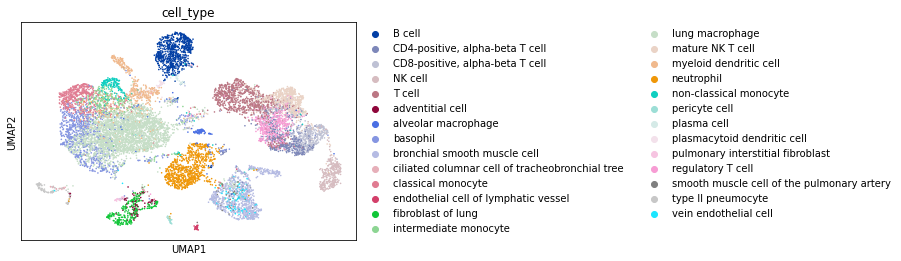

In [31]:
sc.pl.umap(adata, color = 'cell_type')

/home/jrlab2019/miniconda3/envs/sc/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


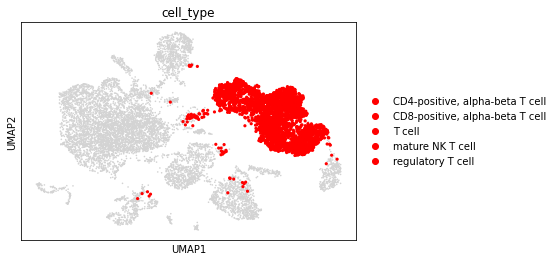

In [46]:
ax = sc.pl.umap(adata, show = False)

sc.pl.umap(adata[adata.obs.cell_type.str.contains('T cell')], palette = ['red'], color = 'cell_type', ax = ax)


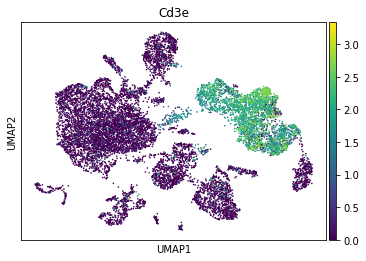

In [47]:
sc.pl.umap(adata, color = 'Cd3e')